In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'figure.figsize': (15, 8)})
sns.set_style('darkgrid')
sns.set_palette('deep')

In [0]:
data = pd.read_csv('reber_sequences.csv')
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [4]:
print('Entire dataset: {}\nTraining data: {}\nTest data: {}'.format(len(data), len(train_data), len(test_data)))

Entire dataset: 25000
Training data: 18750
Test data: 6250


In [5]:
print('Train data: {} Valid, {} Invalid\nTest data: {} Valid, {} Invalid'.format(train_data.valid.value_counts()[1], train_data.valid.value_counts()[0], test_data.valid.value_counts()[1], test_data.valid.value_counts()[0]))

Train data: 9339 Valid, 9411 Invalid
Test data: 3161 Valid, 3089 Invalid


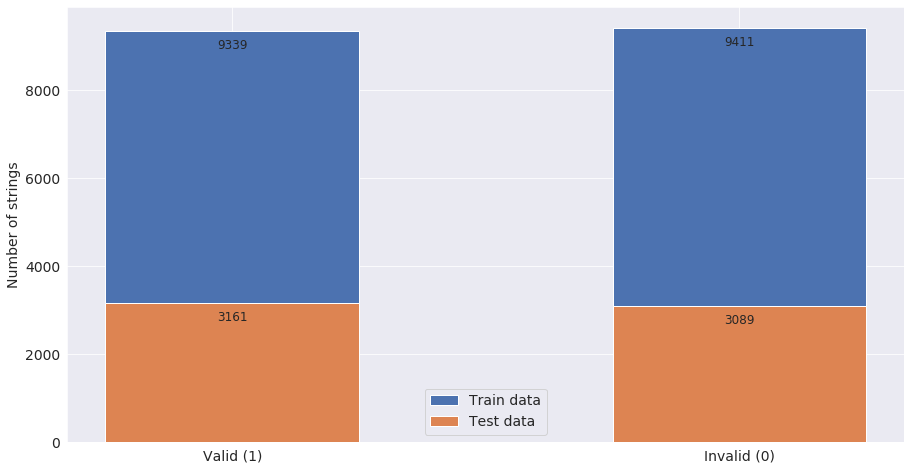

In [6]:
ax = plt.subplot(111)
ax.bar(['Valid (1)', 'Invalid (0)'], [train_data.valid.value_counts()[1], train_data.valid.value_counts()[0]], label='Train data', width=0.5)
ax.bar(['Valid (1)', 'Invalid (0)'], [test_data.valid.value_counts()[1], test_data.valid.value_counts()[0]], label='Test data', width=0.5)

for i in ax.patches:
    ax.text(i.get_x()+.22, i.get_height()-400, str(i.get_height()), fontsize=12)

plt.ylabel('Number of strings')
plt.savefig('./graphs/string_counts.png')
plt.legend()
plt.show()

#### String lengths

In [0]:
def plot_str_len(data, data_type='entire'):
    labels = data.index
    values = data.values

    ax = plt.subplot(111)
    ax.margins(0.03, .1)
    ax.tick_params(axis='x', which='major', pad=-1)

    ax.bar(labels, values)
    ax.plot(data, color='k', marker='|', alpha=.3)
    plt.xticks(range(10, 55), rotation=90, size=10)

    for i in ax.patches:
        height = 10 if data_type == 'test' else 30
        ax.text(i.get_x()+.22, i.get_height()+height, str(i.get_height()), fontsize=10, rotation=90)

    plt.title('String length distribution of {} dataset'.format(data_type))
    plt.savefig('./graphs/{}_dataset_string_len.png'.format(data_type))
    plt.xlabel('Length')
    plt.ylabel('Number of strings')

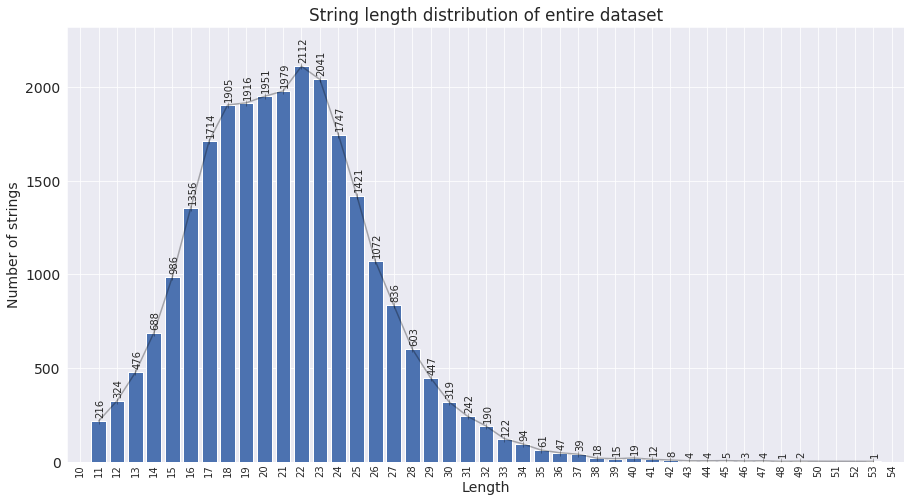

In [8]:
plot_str_len(data.groupby(data['string'].str.len())['string'].count())

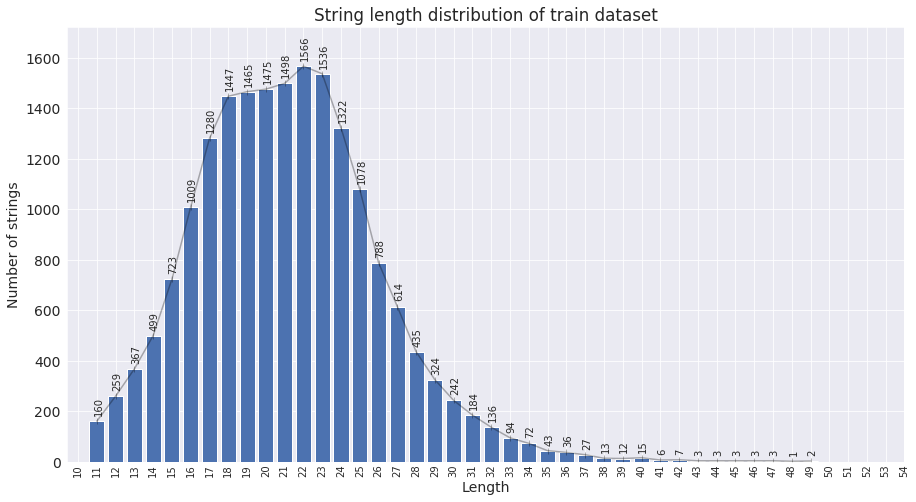

In [9]:
plot_str_len(train_data.groupby(train_data['string'].str.len())['string'].count(), 'train')

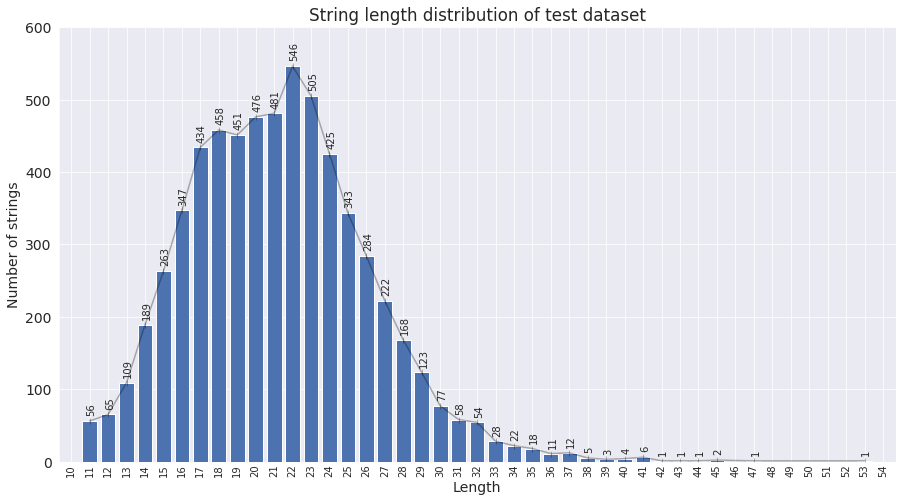

In [10]:
plot_str_len(test_data.groupby(test_data['string'].str.len())['string'].count(), 'test')

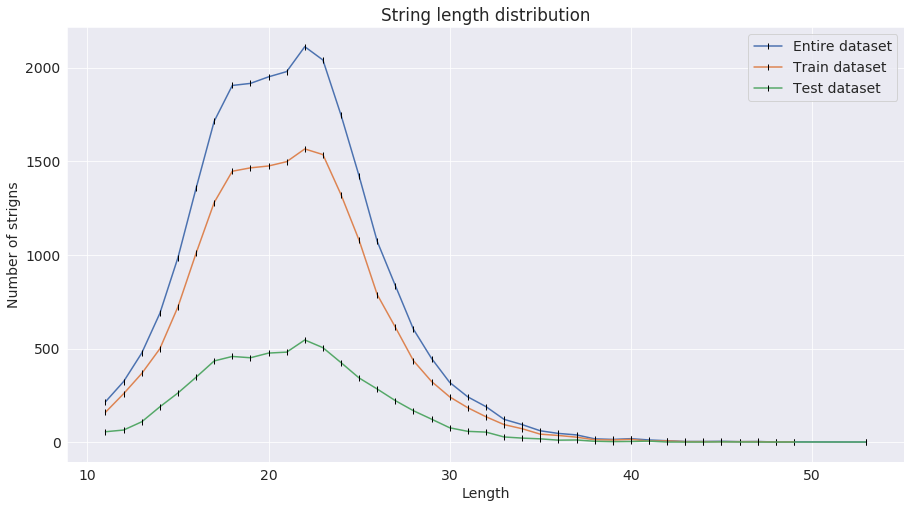

In [11]:
plt.title('String length distribution')
plt.plot(data.groupby(data['string'].str.len())['string'].count(), marker='|', mec='k', label='Entire dataset')
plt.plot(train_data.groupby(train_data['string'].str.len())['string'].count(), marker='|', mec='k', label='Train dataset')
plt.plot(test_data.groupby(test_data['string'].str.len())['string'].count(), marker='|', mec='k', label='Test dataset')
plt.xlabel('Length')
plt.ylabel('Number of strigns')
plt.savefig('./graphs/string_len.png')
plt.legend()
plt.show()

#### Characters

In [0]:
chars = [chr(i) for i in range(ord('A'), ord('Z')+1)]

In [0]:
total_char_count = [data['string'].str.count(c).sum() for c in chars]

In [0]:
train_char_count = [train_data['string'].str.count(c).sum() for c in chars]

In [0]:
test_char_count = [test_data['string'].str.count(c).sum() for c in chars]

In [0]:
colors = ['#55A868' if c in ['B', 'E', 'P', 'S', 'T', 'V', 'X'] else '#4C72B0' for c in chars]

In [0]:
def plot_chars(chars, char_count, data_type='entire'):
    ax = plt.subplot(111)
    ax.tick_params(axis='x', which='major', pad=-1)

    ax.bar(chars, char_count, color=colors)
    plt.xticks(size=10)

    for i in ax.patches:
        ax.text(i.get_x(), i.get_height()+500, str(i.get_height()), fontsize=10)

    plt.title('Character count of {} dataset'.format(data_type))
    plt.savefig('./graphs/{}_dataset_char_count.png'.format(data_type))
    plt.xlabel('Characters')
    plt.ylabel('Count')

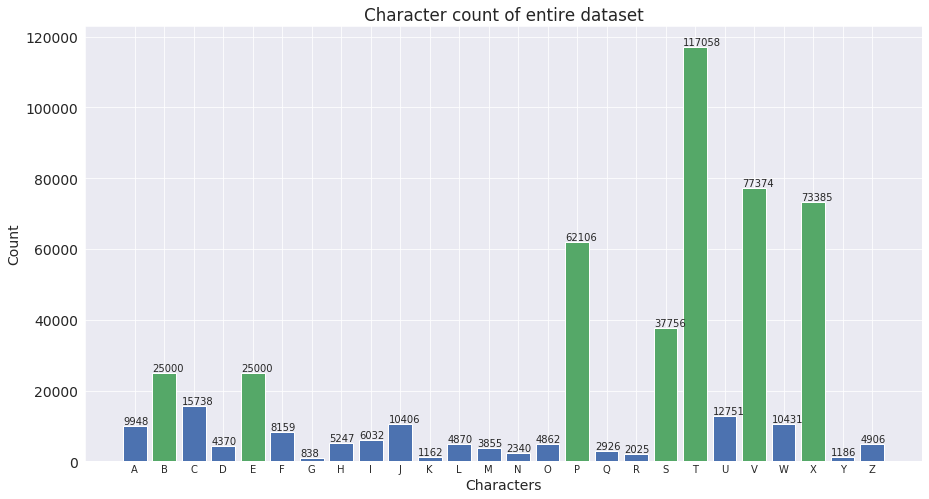

In [18]:
plot_chars(chars, total_char_count)

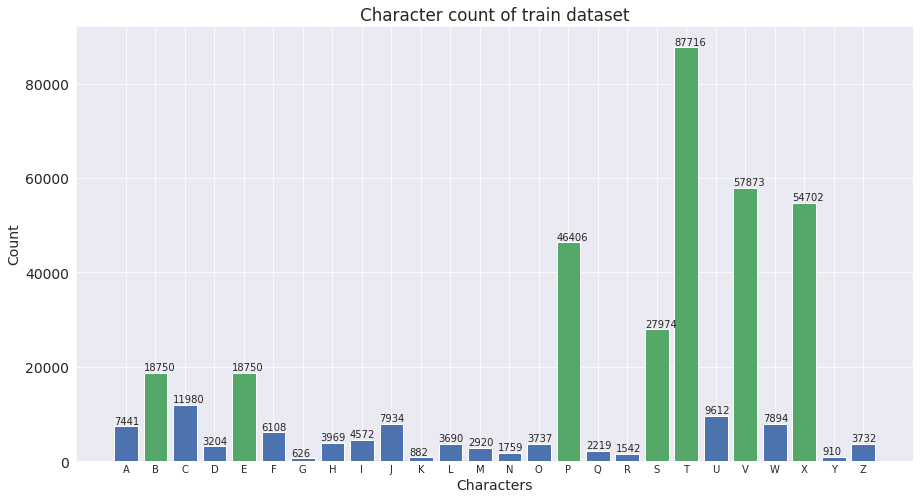

In [19]:
plot_chars(chars, train_char_count, 'train')

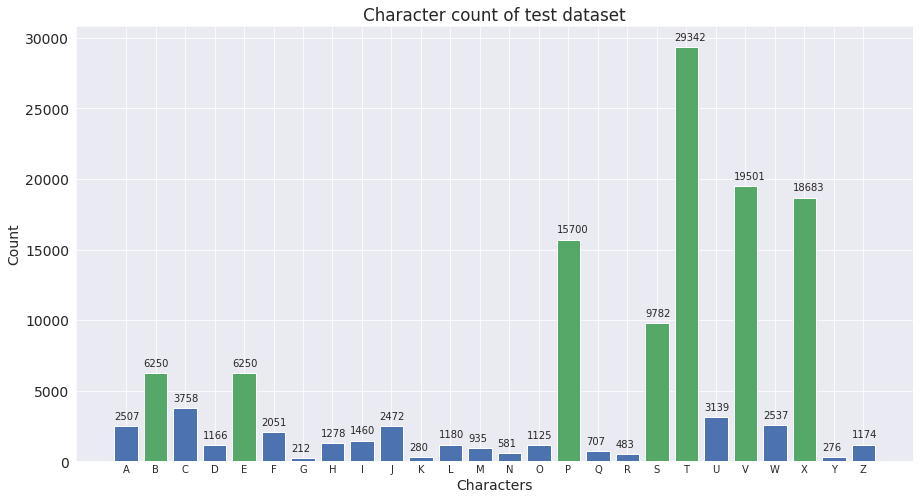

In [20]:
plot_chars(chars, test_char_count, 'test')